In [1]:
import pandas as pd
import geopandas as gpd
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [29]:
twenty_twenty_data = pd.read_csv("./2020.csv")
twenty_twenty_data.head()
twenty_twenty_data= twenty_twenty_data.rename(columns={"Country name":"country","Ladder score":"ladder_score","Regional indicator":"regional_indicator","Social support":"social_support","Healthy life expectancy":"healthy_life_expectancy","Freedom to make life choices":"freedom","Perceptions of corruption":"preception_of_corruption","Logged GDP per capita":"GDP" })
twenty_twenty_data.country.replace("Taiwan Province of China","Taiwan",inplace=True)

world_geometry = gpd.read_file("./world_shapefile/world_shapefile.shp")
world_geometry= world_geometry.rename(columns={"NAME":"name"})
#add lat and long...

twenty_twenty_data

,country,regional_indicator,ladder_score,Standard error of ladder score,upperwhisker,lowerwhisker,GDP,social_support,healthy_life_expectancy,freedom,Generosity,preception_of_corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [30]:
continents = {
    'EU':'Europe',
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Oceania',
    'AF': 'Africa',
}

def add_continet(row):
    try:
       
        code =country_name_to_country_alpha2(row.country, cn_name_format="default")
        return continents[country_alpha2_to_continent_code(code)]
    except:
        print(row.country)
        return row.regional_indicator.split(" ")[-1]
        

twenty_twenty_data['continent']=twenty_twenty_data.apply(add_continet,axis=1)
twenty_twenty_data.continent

Kosovo
North Cyprus
Hong Kong S.A.R. of China
Congo (Brazzaville)
Palestinian Territories
Congo (Kinshasa)


0      Europe
1      Europe
2      Europe
3      Europe
4      Europe
        ...  
148    Africa
149    Africa
150    Africa
151    Africa
152      Asia
Name: continent, Length: 153, dtype: object

In [4]:
#twenty_twenty_data_gpd= twenty_twenty_data.join(world_geometry.set_index('name'), on='name')
twenty_twenty_data_gpd = pd.merge(world_geometry,twenty_twenty_data, how='right', left_on=['name'], right_on = ['country'])
twenty_twenty_data_gpd =gpd.GeoDataFrame(twenty_twenty_data_gpd)
twenty_twenty_data_gpd

,FIPS,ISO2,ISO3,UN,name,AREA,POP2005,REGION,SUBREGION,LON,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,continent
0,FI,FI,FIN,246.0,Finland,30459.0,5246004.0,150.0,154.0,26.272,...,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,Europe
1,DA,DK,DNK,208.0,Denmark,4243.0,5416945.0,150.0,154.0,9.264,...,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,Europe
2,SZ,CH,CHE,756.0,Switzerland,4000.0,7424389.0,150.0,155.0,7.908,...,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,Europe
3,IC,IS,ISL,352.0,Iceland,10025.0,295732.0,150.0,154.0,-18.480,...,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,Europe
4,NO,NO,NOR,578.0,Norway,30625.0,4638836.0,150.0,154.0,8.740,...,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,CT,CF,CAF,140.0,Central African Republic,62298.0,4191429.0,2.0,17.0,20.483,...,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,Africa
149,RW,RW,RWA,646.0,Rwanda,2467.0,9233793.0,2.0,14.0,29.917,...,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,Africa
150,ZI,ZW,ZWE,716.0,Zimbabwe,38685.0,13119679.0,2.0,14.0,29.872,...,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,Africa
151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,Africa


In [5]:
twenty_twenty_data_gpd.loc[twenty_twenty_data_gpd.geometry.isnull()]
#clean this data up....

,FIPS,ISO2,ISO3,UN,name,AREA,POP2005,REGION,SUBREGION,LON,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,continent
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.922328,1.972317,0.840481,1.183963,0.672709,0.557280,0.325287,0.008559,2.736903,Europe
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.789067,1.972317,1.245301,1.133561,1.022543,0.259356,0.170304,0.094596,1.946757,Asia
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.913314,1.972317,0.707917,1.237312,0.713299,0.389571,0.174049,0.014379,2.370968,Europe
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.626116,1.972317,1.212799,1.183089,1.026125,0.477886,0.199160,0.199803,1.236688,Europe
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.420607,1.972317,1.376746,1.243584,1.136631,0.459357,0.288281,0.332485,0.673293,Asia
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.668779,1.972317,1.021914,1.196284,0.615627,0.451354,0.142758,0.172258,1.888563,Africa
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.796421,1.972317,0.718092,1.253075,0.819134,0.650836,0.136489,0.089848,1.685978,Asia
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.790772,1.972317,0.537094,0.799727,0.154943,0.397123,0.169916,0.093496,3.081023,Africa
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.751779,1.972317,0.633617,0.757636,0.458101,0.386514,0.117216,0.118671,2.722620,Africa
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.897491,1.972317,0.935372,1.183174,0.802994,0.410225,0.185864,0.024595,1.617595,Europe


<AxesSubplot:title={'center':'Happiness Score By Country'}>

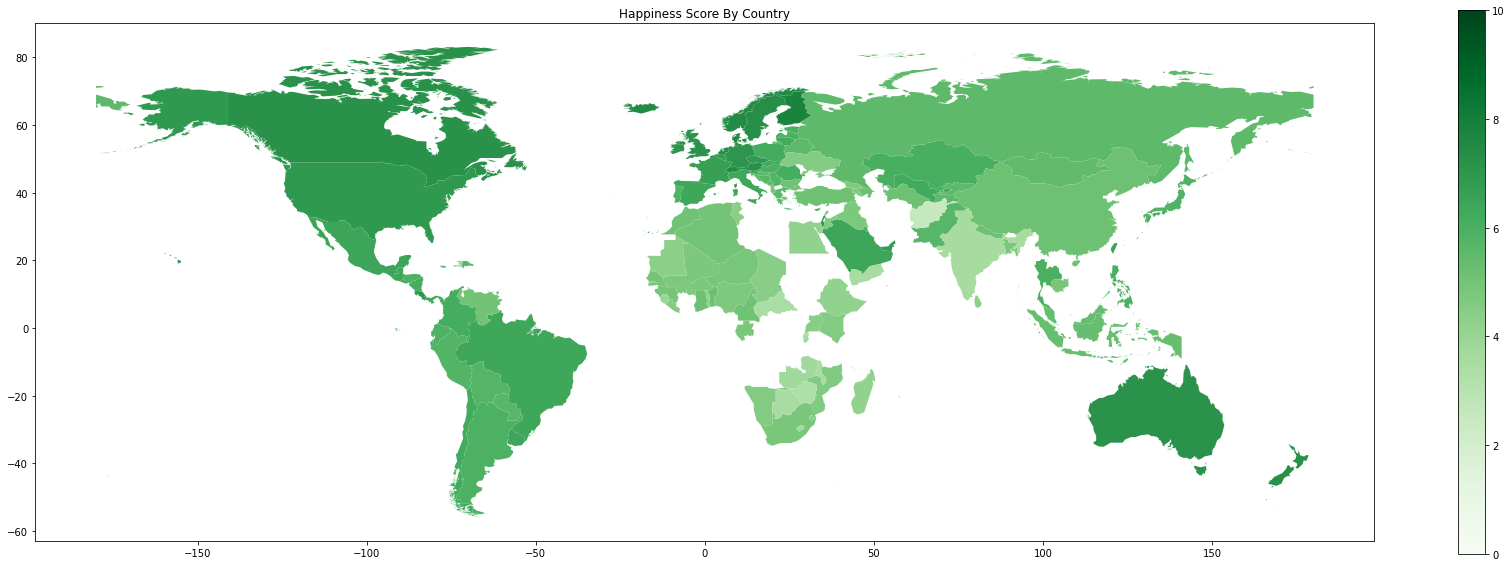

In [82]:
fig, ax = plt.subplots(1, figsize=(30, 10))

plt.title("Happiness Score By Country")
twenty_twenty_data_gpd.plot('ladder_score', cmap='Greens', linewidth=0.8, ax=ax,legend=True, vmin=0,vmax=10)

<AxesSubplot:title={'center':'The Happiest Countries in The World'}, xlabel='ladder_score', ylabel='country'>

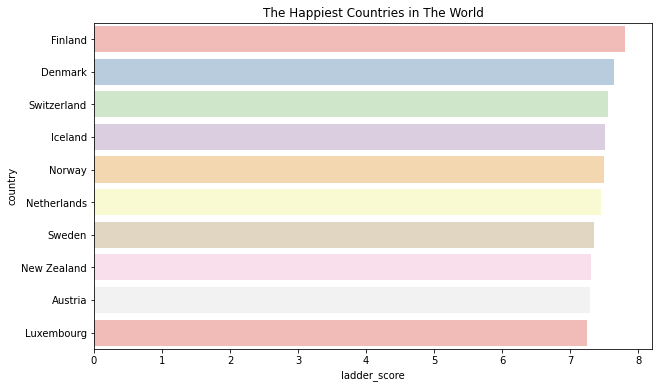

In [6]:
plt.figure(figsize=(10,6))
plt.title("The Happiest Countries in The World")
sns.barplot(data=twenty_twenty_data[:10], y="country",x="ladder_score",palette="Pastel1")

<AxesSubplot:title={'center':'The Happiest Continents in The World'}, ylabel='continent'>

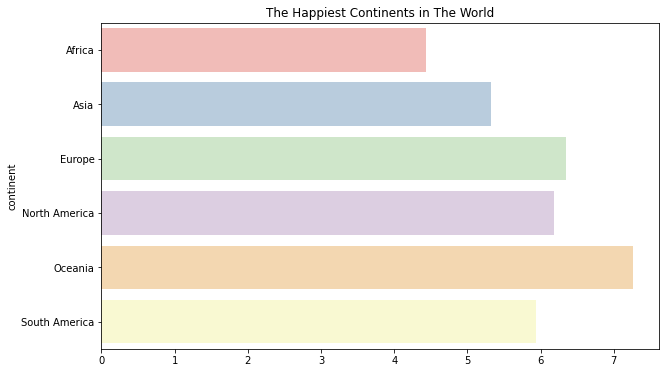

In [7]:
plt.figure(figsize=(10,6))
plt.title("The Happiest Continents in The World")
#sns.barplot(data=twenty_twenty_data["continent"]., y="country",x="ladder_score")
data=twenty_twenty_data.groupby('continent').ladder_score.sum()/twenty_twenty_data.groupby('continent').ladder_score.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")

<AxesSubplot:ylabel='continent'>

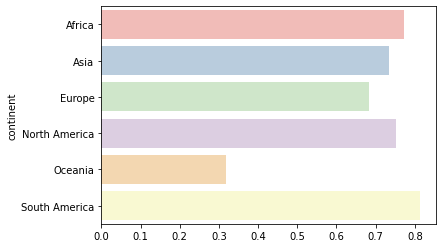

In [33]:
corruption_data=twenty_twenty_data.groupby('continent').preception_of_corruption.sum()/twenty_twenty_data.groupby('continent').preception_of_corruption.count()
sns.barplot(y=corruption_data.index,x=corruption_data.values,palette="Pastel1")


<Figure size 864x504 with 0 Axes>

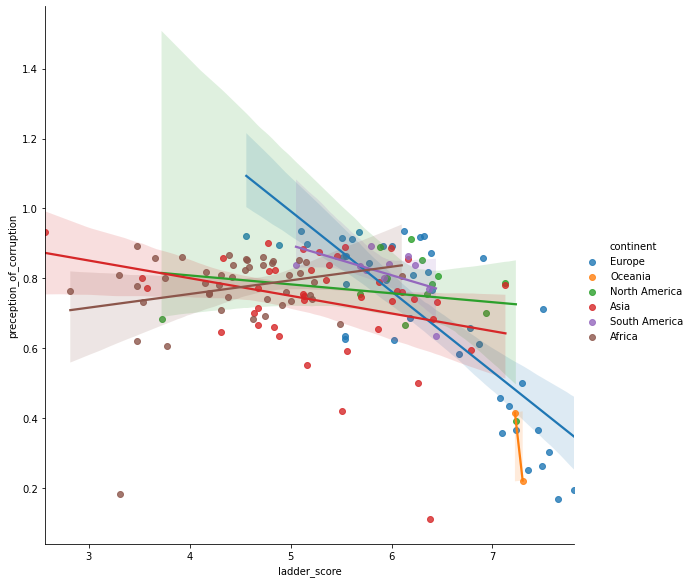

In [64]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="preception_of_corruption",hue="continent", height=8)

<AxesSubplot:ylabel='continent'>

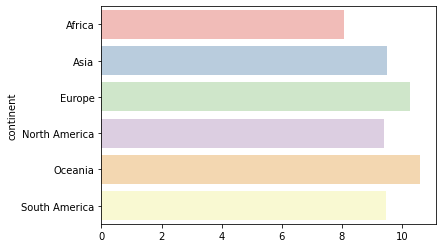

In [49]:

data=twenty_twenty_data.groupby('continent').GDP.sum()/twenty_twenty_data.groupby('continent').GDP.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")


<Figure size 864x504 with 0 Axes>

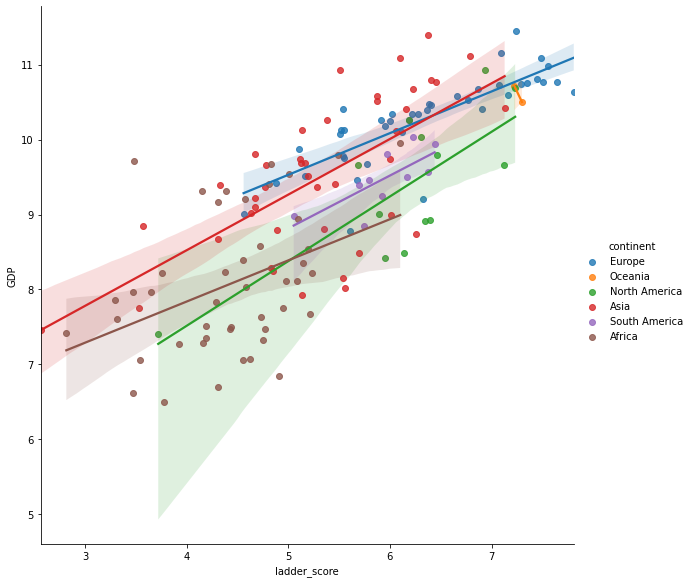

In [65]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="GDP",hue="continent", height=8)

<AxesSubplot:ylabel='continent'>

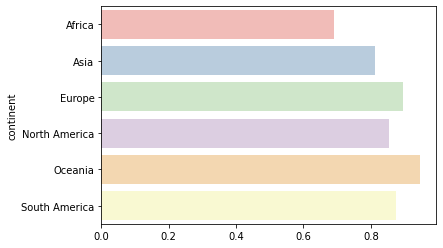

In [35]:


data=twenty_twenty_data.groupby('continent').social_support.sum()/twenty_twenty_data.groupby('continent').social_support.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")



<Figure size 864x504 with 0 Axes>

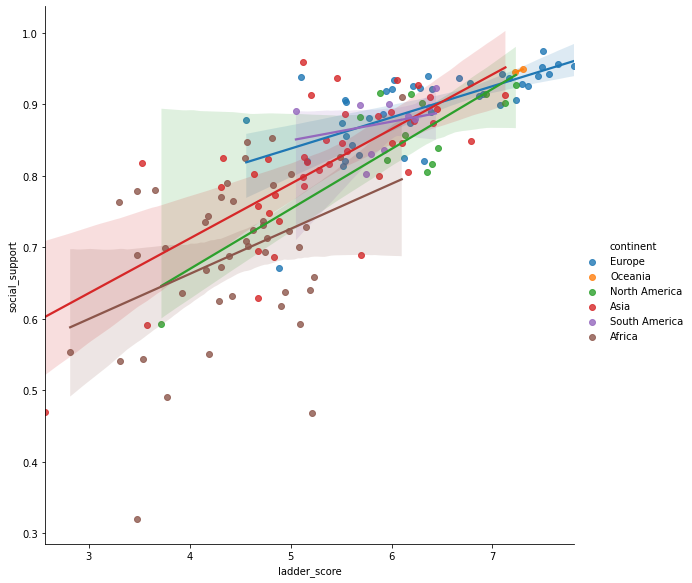

In [66]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="social_support",hue="continent", height=8)

<AxesSubplot:ylabel='continent'>

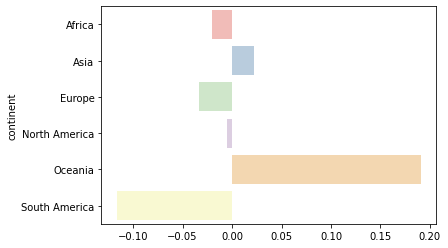

In [37]:


data=twenty_twenty_data.groupby('continent').Generosity.sum()/twenty_twenty_data.groupby('continent').Generosity.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")



<Figure size 864x504 with 0 Axes>

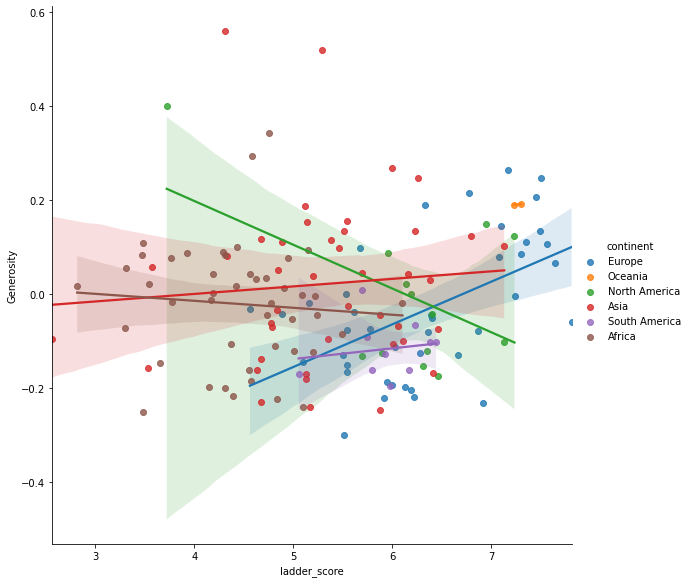

In [67]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="Generosity",hue="continent", height=8)

<AxesSubplot:ylabel='continent'>

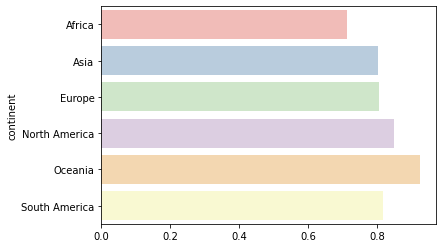

In [39]:

data=twenty_twenty_data.groupby('continent').freedom.sum()/twenty_twenty_data.groupby('continent').freedom.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")

<Figure size 864x504 with 0 Axes>

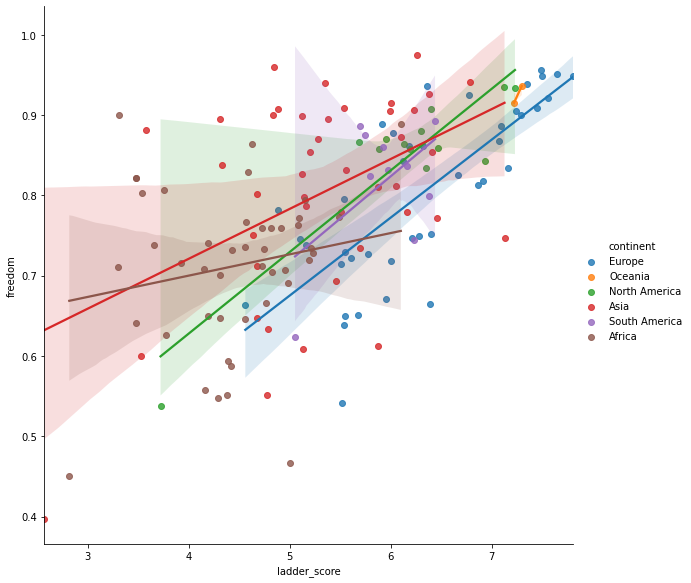

In [68]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="freedom",hue="continent", height=8)

<AxesSubplot:ylabel='continent'>

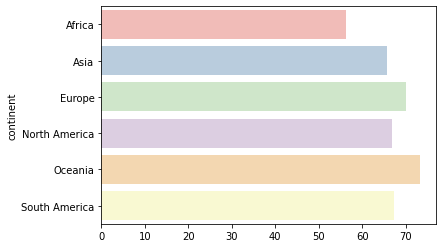

In [75]:

data=twenty_twenty_data.groupby('continent').healthy_life_expectancy.sum()/twenty_twenty_data.groupby('continent').healthy_life_expectancy.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")

<Figure size 864x504 with 0 Axes>

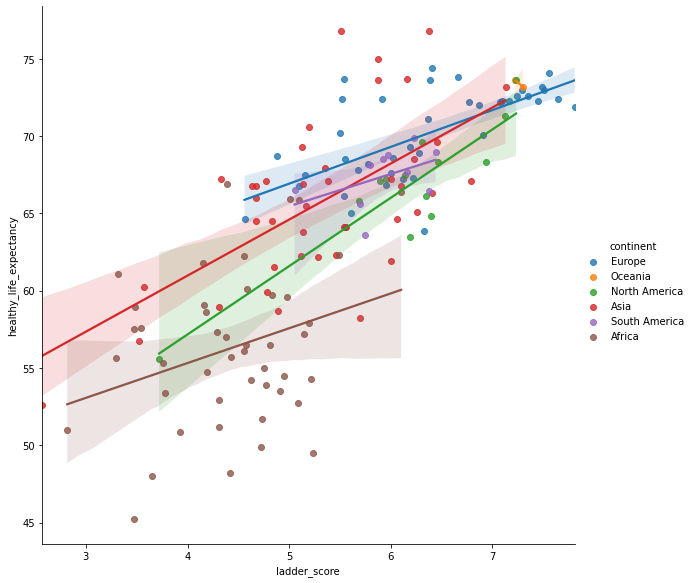

In [74]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="healthy_life_expectancy",hue="continent", height=8)

<AxesSubplot:>

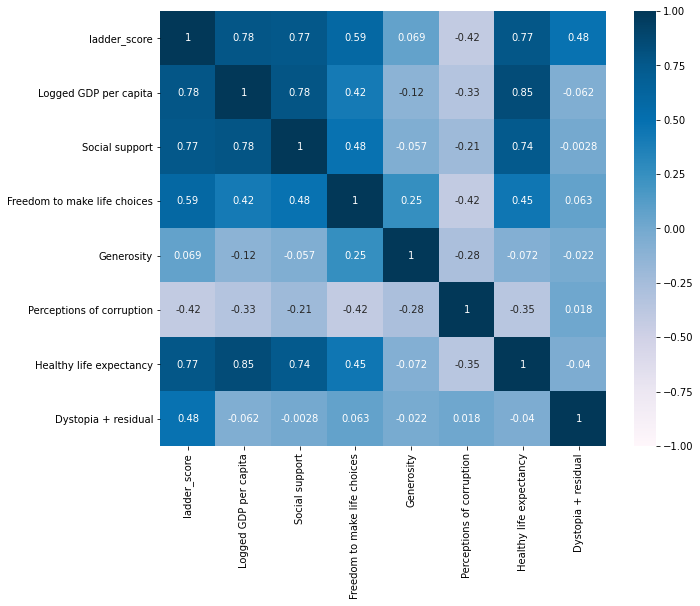

In [10]:
#plt.title("Happiness Score By Factor")
fig, ax = plt.subplots(figsize=(10, 8))
twenty_twenty_relevant_data = twenty_twenty_data.loc[:,["ladder_score","Logged GDP per capita","Social support","Freedom to make life choices","Generosity","Perceptions of corruption","Healthy life expectancy","Dystopia + residual"]].copy()
#twenty_twenty_relevant_data= twenty_twenty_relevant_data.set_index("ladder_score")
#sns.heatmap(data=twenty_twenty_relevant_data)
corr = twenty_twenty_relevant_data.corr()
sns.heatmap(corr,vmin=-1, vmax=1, annot=True,cmap='PuBu')

North America
South America
Europe
Oceania
Africa
Asia


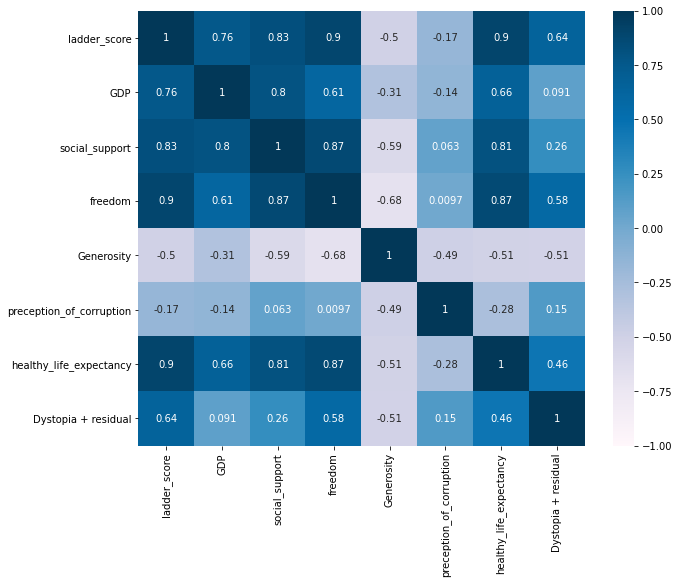

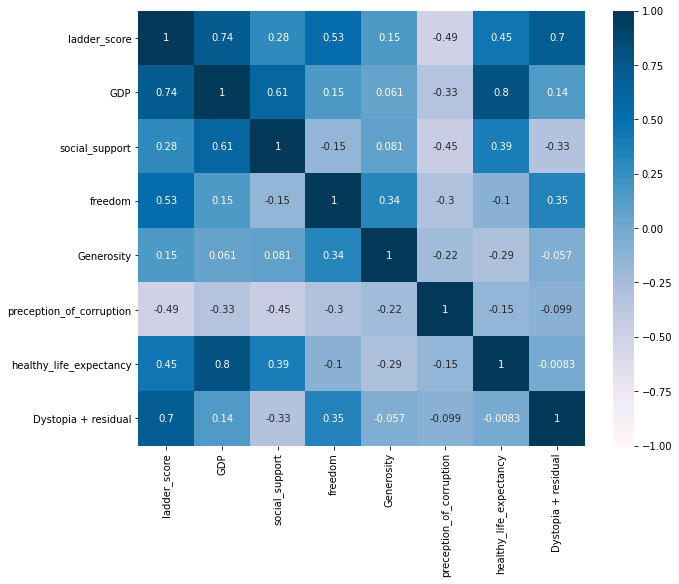

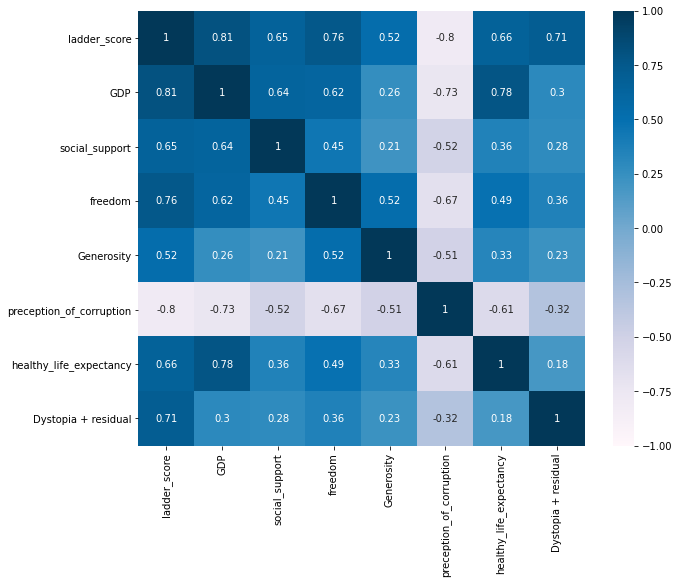

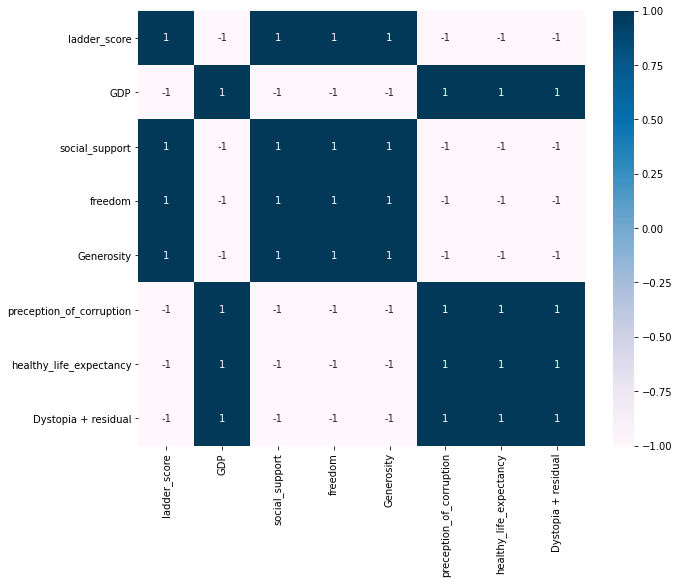

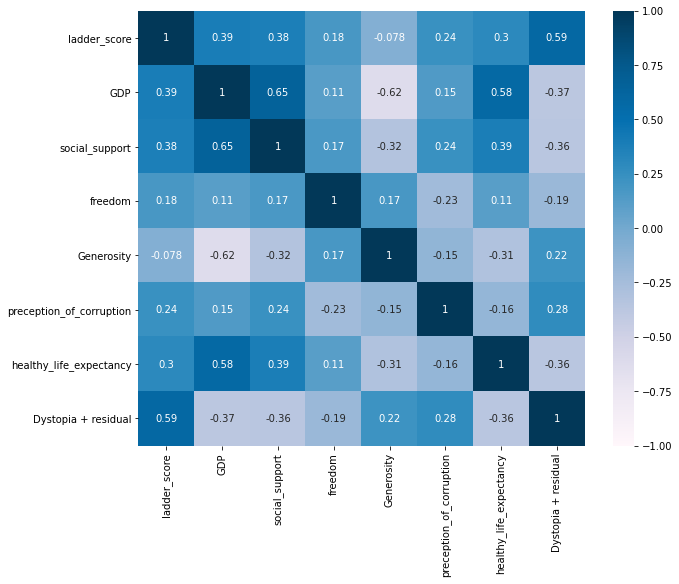

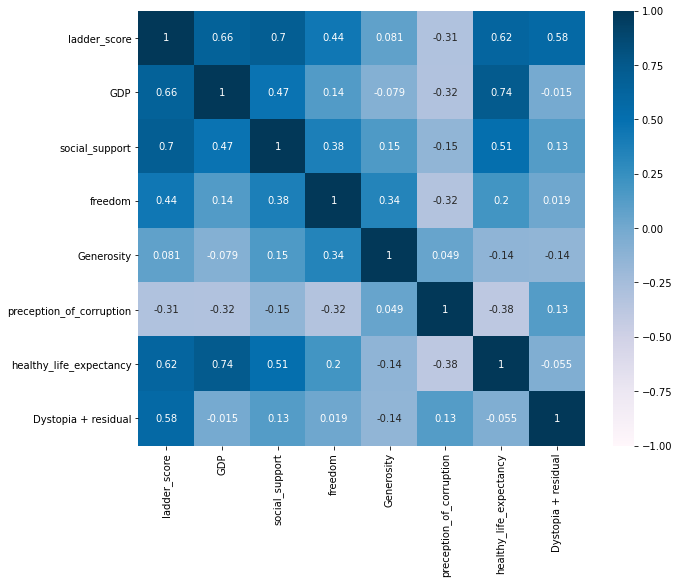

In [78]:
for i in["North America","South America","Europe","Oceania","Africa","Asia"]:
    fig, ax = plt.subplots(figsize=(10, 8))
    print(i)
    twenty_twenty_relevant_data = twenty_twenty_data.loc[twenty_twenty_data.continent==i].loc[:,["ladder_score","GDP","social_support","freedom","Generosity","preception_of_corruption","healthy_life_expectancy","Dystopia + residual"]].copy()

    sns.heatmap(twenty_twenty_relevant_data.corr(),vmin=-1, vmax=1, annot=True,cmap='PuBu')

In [21]:

twenty_twenty_data[:].sum()

country                                       FinlandDenmarkSwitzerlandIcelandNorwayNetherla...
regional_indicator                            Western EuropeWestern EuropeWestern EuropeWest...
ladder_score                                                                            837.406
Standard error of ladder score                                                          8.19138
upperwhisker                                                                            853.461
lowerwhisker                                                                            821.351
Logged GDP per capita                                                                   1422.24
Social support                                                                          123.734
Healthy life expectancy                                                                 9860.17
Freedom to make life choices                                                            119.854
Generosity                              

In [81]:
twenty_twenty_relevant_data = twenty_twenty_data.loc[twenty_twenty_data.continent=="Oceania"].loc[:,["ladder_score","GDP","social_support","freedom","Generosity","preception_of_corruption","healthy_life_expectancy","Dystopia + residual"]].copy()
twenty_twenty_relevant_data.corr()

,ladder_score,GDP,social_support,freedom,Generosity,preception_of_corruption,healthy_life_expectancy,Dystopia + residual
ladder_score,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
GDP,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
social_support,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
freedom,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
Generosity,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
preception_of_corruption,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
healthy_life_expectancy,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
Dystopia + residual,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0


In [28]:
twenty_twenty_data.groupby('continent').ladder_score.count()

continent
Africa           45
Asia             42
Europe           41
North America    13
Oceania           2
South America    10
Name: ladder_score, dtype: int64